In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import phase_transition
import pickle
import os
import copy
import time
import os

In [10]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [11]:
res_path = "../../Results/Ising_Frustrated/"
files = os.listdir(res_path + "CI/")

L = 20

N = 100
ratios = np.linspace(0, 1, N)

## Phase transitions with CI

In [12]:
files = os.listdir(res_path + "CI/")

M, E, Ch = [], [], []

for file in files: 
    with open(res_path + "CI/" + file, "rb") as file:
            Magnetizations, Frequencies, Energies = pickle.load(file)

    n = len(Magnetizations)

    Mag, Chi, Ene = [], [], []

    for i in range(n):
        Magn = np.array(Magnetizations[i])
        Freq = np.array(Frequencies[i])
        En = np.array(Energies[i])
        
        M_mean = (Magn * Freq).sum() / Freq.sum()
        En_mean = (En * Freq).sum() / Freq.sum()
        C = ((Magn - M_mean)**2 * Freq).sum() / Freq.sum()
        Mag.append(M_mean)
        Chi.append(C)
        Ene.append(En_mean)


    M.append(Mag), E.append(En), Ch.append(Chi)

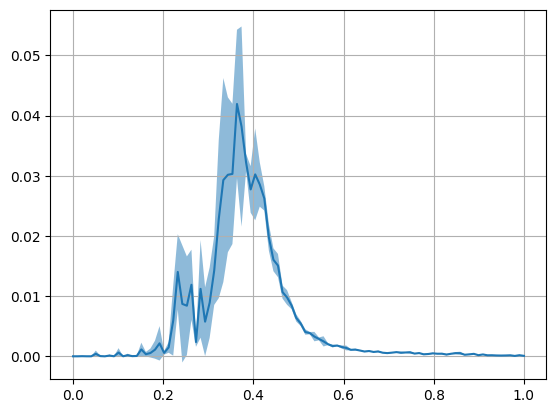

In [13]:
Ch_mean = np.mean(Ch, axis=0)
Ch_std = np.std(Ch, axis=0)

plt.plot(ratios, Ch_mean)
plt.fill_between(ratios, Ch_mean - Ch_std, Ch_mean + Ch_std, alpha=0.5)
plt.grid()

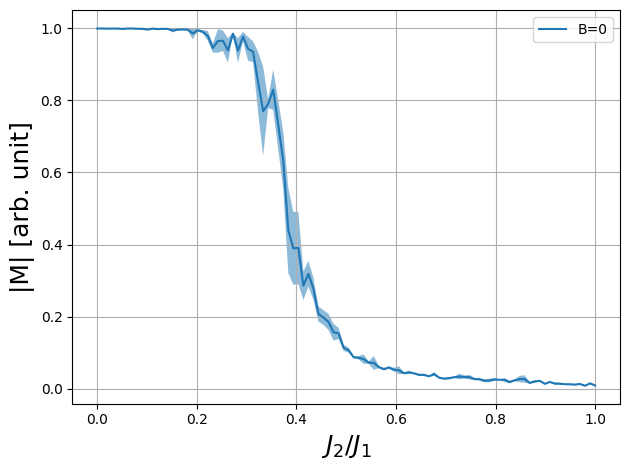

In [14]:
M_mean = np.mean(M, axis=0)
M_std = np.std(M, axis=0)

plt.plot(ratios, M_mean, label='B=0')
plt.fill_between(ratios, M_mean - M_std, M_mean + M_std, alpha=0.5)
plt.grid()
plt.xlabel(r'$J_2$/$J_1$', fontsize=18)
plt.ylabel('|M| [arb. unit]', fontsize=18)
plt.tight_layout()
plt.legend()
#plt.savefig('../../Images/Ising_Frustrated/magnetization.png', dpi=600, transparent=True)

In [23]:
#np.savetxt("../../Results/Ising_Frustrated/DWave/100_ratio_points.txt", np.vstack([ratios, M_mean, M_std]).T)

## Graph Plot

In [15]:
L = 20
Lattice_Size = (L, L)
periodic = True

C_G = nx.grid_graph(dim=Lattice_Size, periodic=periodic)

for x in range(L-1):
    for y in range(L-1):
        C_G.add_edge((x, y), (x+1, y+1))

        C_G.add_edge((x+1, y), (x, y+1))

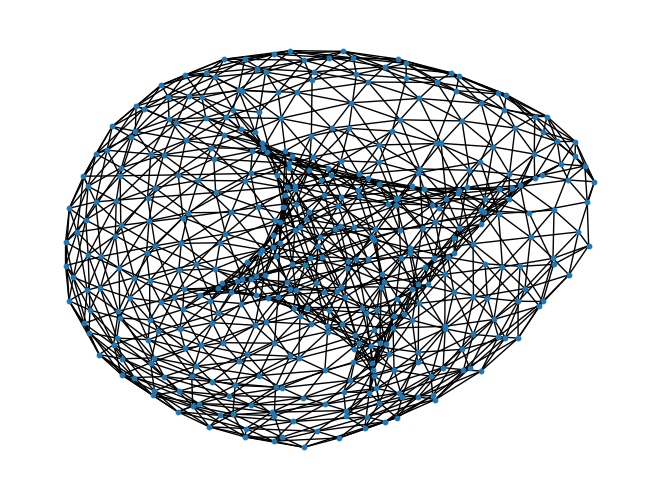

In [16]:
nx.draw(G=C_G, node_size=10)